In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
def fitness(parents):
    return sorted(parents, key=lambda x: contar_conflictos(x))

def contar_conflictos(poblacion):
    conflictos = 0
   # print(poblacion)
    for i in range(poblacion.shape[0]):
        for j in range(poblacion.shape[0]):
            if i != j:
                if poblacion[i] == poblacion[j]:
                    conflictos += 1
                if abs(i - j) == abs(poblacion[i] - poblacion[j]):
                    conflictos += 1
    return conflictos
    
def randomCrossOver(paths):
    index = np.random.randint(0, len(paths[0]), 2)
    selection = paths[0][index[0]:index[1]]
    mask = np.isin(paths[1], np.setdiff1d(paths[1], selection))
    return np.append(paths[1][mask], selection)


def crossOver(paths, totalPaths=10):
    newPaths = [paths[0]]
    for i in range(1, totalPaths):
        index = np.random.randint(0, len(paths), 2)
        newPaths.append(randomCrossOver([paths[index[0]], paths[index[1]]]))
    return newPaths

def mutation(paths, mutationRate=0.1):
    for i in range(1, len(paths)):
        if np.random.random() < mutationRate:
            index = np.random.randint(0, len(paths[0]), 2)
            paths[i][index[0]], paths[i][index[1]] = paths[i][index[1]], paths[i][index[0]]
    return paths

In [51]:
def GeneticAlgorithm(parents, takebest=8, iteraciones=100):
    res = []
    for i in range(iteraciones):        
        parents = fitness(parents)        
        res.append([parents[0],contar_conflictos(parents[0])])
        if(contar_conflictos(parents[0]) == 0):
            break
        parents = crossOver(parents,takebest)
        parents = mutation(parents)
    df = pd.DataFrame(res, columns=['solucion', 'conflictos'])
    return fitness(parents), df 

<AxesSubplot:>

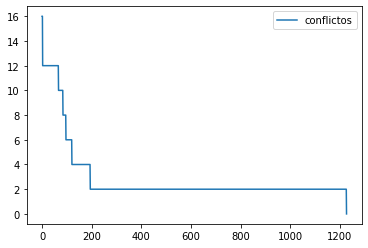

In [53]:
n = 20
pociciones = np.arange(n, dtype=int)
pociciones = [np.random.permutation(pociciones) for i in range(n)] 
pociciones

res ,df= GeneticAlgorithm(pociciones,takebest=n,iteraciones=10000)
df.plot()

In [54]:
df

,solucion,conflictos
0,"[9, 6, 10, 11, 19, 7, 13, 18, 8, 17, 1, 2, 15,...",16
1,"[9, 6, 10, 11, 19, 7, 13, 18, 8, 17, 1, 2, 15,...",16
2,"[9, 6, 10, 4, 14, 5, 16, 11, 19, 7, 13, 18, 8,...",12
3,"[9, 6, 10, 4, 14, 5, 16, 11, 19, 7, 13, 18, 8,...",12
4,"[9, 6, 10, 4, 14, 5, 16, 11, 19, 7, 13, 18, 8,...",12
...,...,...
1223,"[3, 13, 18, 8, 17, 12, 2, 15, 1, 6, 14, 10, 4,...",2
1224,"[3, 13, 18, 8, 17, 12, 2, 15, 1, 6, 14, 10, 4,...",2
1225,"[3, 13, 18, 8, 17, 12, 2, 15, 1, 6, 14, 10, 4,...",2
1226,"[3, 13, 18, 8, 17, 12, 2, 15, 1, 6, 14, 10, 4,...",2


[ 3 13 18  8  2 12 17 15  1  6 14 10  4  0  5 16 11 19  7  9] 0


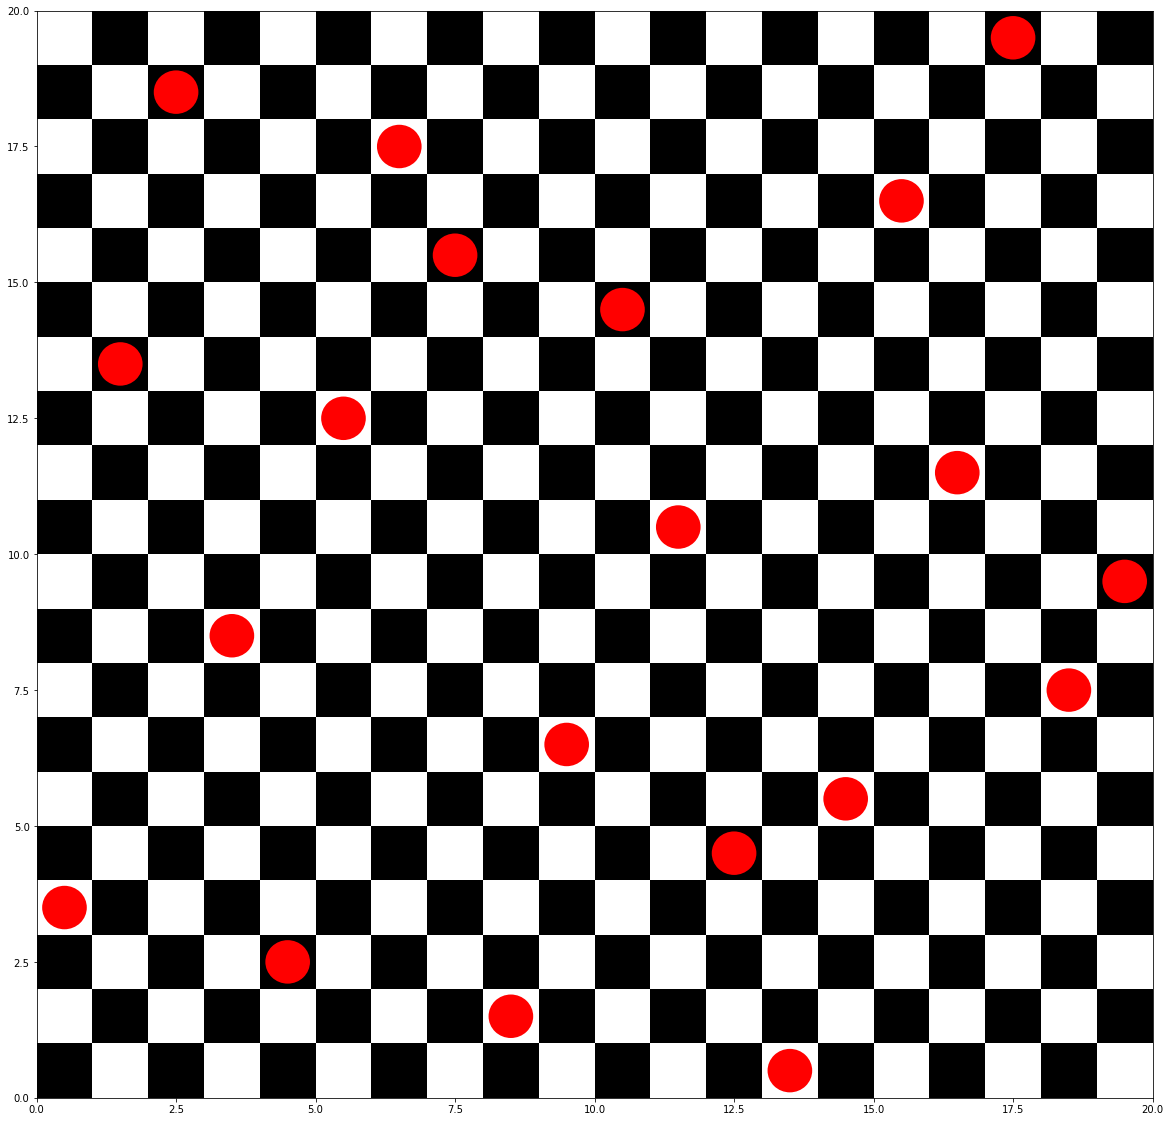

In [55]:
def plotsolution(solucion , n):
    fig = plt.figure(figsize=(n,n))
    ax = fig.add_subplot(111)
    ax.set_xlim(0,n)
    ax.set_ylim(0,n)

    for i in range(n):
        for j in range(n):
            if (i+j)%2==0:
                ax.add_patch(plt.Rectangle((i,j),1,1,facecolor='black'))
            else:
                ax.add_patch(plt.Rectangle((i,j),1,1,facecolor='white'))

    for i in range(n):
        ax.add_patch(plt.Circle((i+.5,solucion[0][i]+.5),0.4,facecolor='red'))

    plt.show()
print(res[0], contar_conflictos(res[0]))
plotsolution(res,n)